#import libararies & installation

In [ ]:
!pip install gensim


In [ ]:
!pip install num2words


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.3/143.3 kB 2.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13706 sha256=cb596d1190d289f0170a6e5e647fb3d62b97e0d884c2341b030fef851802855b
  Stored in directory: /root/.cache/pip/wheels/fc/ab/d4/5da2067ac95b36618c629a5f93f809425700506f72c9732fac
Successfully built docopt


In [ ]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
import pandas as pd
import re
import re
import nltk
import string
import numpy as np
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, Bidirectional, LSTM, Dense
from keras.optimizers import Adam
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder
from num2words import num2words
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from nltk.stem import WordNetLemmatizer
from nltk.stem.isri import ISRIStemmer
from transformers import BertTokenizer, BertForSequenceClassification
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
from sklearn.metrics import accuracy_score, classification_report
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder

nltk.download('punkt')
nltk.download('stopwords')
le = LabelEncoder()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


#load & preprocessing

In [ ]:
traindata = pd.read_excel("/content/drive/MyDrive/NLP/News_train.xlsx")
testdata = pd.read_excel("/content/drive/MyDrive/NLP/News_test.xlsx")


In [ ]:
traindata

,Type,News
0,politics,اشتباك الحريري-عون.. اتهامات لباسيل بالتمسك با...
1,politics,عون: الحريري أصبح غريب الأطوار
2,politics,وزير الخارجية الأمريكي: ندرس سحب كامل قواتنا م...
3,politics,أفغانستان.. استعدادات حثيثة لاجتماع تركيا وكاب...
4,politics,أندبندنت‮:‬ ‬مفاوضات ‬سرّية ‬‬كادت ‬تنقذ ‬القذافي
...,...,...
4995,politics,أوروبا تبدأ إحصاء خسائر الفيضانات المدمرة
4996,politics,قتل متظاهر بالرصاص خلال احتجاجات على شحّ الميا...
4997,politics,وسائل إعلام إيرانية تتحدث عن اندلاع احتجاجات ف...
4998,politics,المفاوضات الأفغانية تتواصل في العاصمة القطرية ...


<Axes: xlabel='Type'>

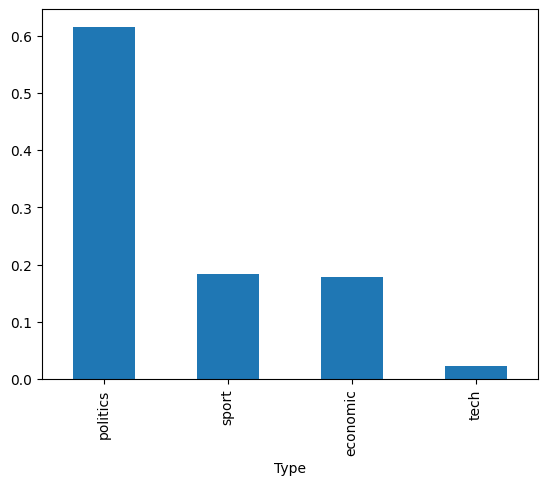

In [ ]:
traindata['Type'].value_counts(normalize = True).plot.bar()

In [ ]:
traindata['Type'].unique()

array(['politics', 'economic', 'sport', 'tech'], dtype=object)

In [ ]:
traindata['Type'] = traindata['Type'].replace({'politics': 0, 'economic': 1, 'sport': 2, 'tech': 3})


In [ ]:
stop_words = set(stopwords.words('arabic'))
print(stop_words)

{'وهو', 'أربعة', 'أولئك', 'لوما', 'ة', 'يفعلون', 'أطعم', 'أصبح', 'زاي', 'لات', 'ليس', 'سبعمائة', 'تلقاء', 'أي', 'اللائي', 'خاء', 'دينار', 'سبحان', 'ممن', 'تارة', 'بهم', 'هَجْ', 'هيّا', 'هاته', 'إليكما', 'كأنّ', 'ذوا', 'أغسطس', 'ارتدّ', 'بيد', 'ر', 'أفٍّ', 'قاطبة', 'صهٍ', 'أيار', 'ذين', 'ياء', 'ولو', 'بَلْهَ', 'ماي', 'عيانا', 'و', 'سرعان', 'د', 'نفس', 'بضع', 'ثلاثين', 'حقا', 'تانِك', 'جوان', 'أل', 'صهْ', 'كأن', 'غير', 'جميع', 'ميم', 'سبت', 'إذا', 'إياكما', 'إياكم', 'لعمر', 'نون', 'لك', 'بعض', 'خلافا', 'إياكن', 'لمّا', 'تخذ', 'مليم', 'ليرة', 'سين', 'أربعمائة', 'حمدا', 'ذو', 'ترك', 'تلك', 'اثني', 'مذ', 'به', 'كل', 'نوفمبر', 'بكم', 'مئة', 'عوض', 'لعل', 'ابتدأ', 'هن', 'ثالث', 'إياها', 'انبرى', 'كرب', 'حدَث', 'إذن', 'بها', 'ذات', 'عشرة', 'عشرون', 'ظنَّ', 'اللذين', 'أربع', 'هبّ', 'تِه', 'بنا', 'أمامكَ', 'صبر', 'ثاني', 'ت', 'كيفما', 'واهاً', 'دال', 'كأين', 'بين', 'بمن', 'ق', 'لستما', 'لاسيما', 'جيم', 'راء', 'ذلكما', 'ث', 'قبل', 'اللاتي', 'ز', 'عدَّ', 'أين', 'والذي', 'بؤسا', 'ثلاثاء', 'لها', 'أ

In [ ]:
def preprocess_text(text):
   # ازالة الحركات
    noise = re.compile(""" ّ    | # Tashdid
                       َ    | # Fatha
                       ً    | # Tanwin Fath
                       ُ    | # Damma
                       ٌ    | # Tanwin Damm
                       ِ    | # Kasra
                       ٍ    | # Tanwin Kasr
                       ْ    | # Sukun
                      ـ     # Tatwil/Kashida
                    """, re.VERBOSE)
    processed_text = re.sub(noise, '', text)
    processed_text = re.sub(r'(.)\1+', r"\1\1", text)
    tokens = nltk.word_tokenize(text)

    punctuations = '''`÷×؛<>_()*&^%][ـ،/:"؟.,'{}~¦+|!”…“–ـ''' + string.punctuation
    tokens = [token for token in tokens if re.match(r'\w', token) or token == '?']
    numbers = re.compile(r'\b\d+\b')
    stop_words = set(stopwords.words('arabic'))
    tokens = [token for token in tokens if token not in stop_words]

    # 5. lemmatization
    #هي عمليه ارجاع الكلمات الى جذورها الاصليه
    #lemmatizer = WordNetLemmatizer()
    # Lemmatize each word
    #tokens = [lemmatizer.lemmatize(token) for token in tokens]

    # 5. Initialize the Stemmer
    stemmer = ISRIStemmer()
    tokens = [stemmer.stem(token) for token in tokens]
    # Join tokens back into text
    #تحويل الكلمات إلى نص مرة اخرى
    processed_text = ' '.join(tokens).strip()

    # Remove longation (diacritics) and numbers
    processed_text = re.sub(r'\b\d+\b', replace_numbers_with_words, processed_text)
    processed_text = re.sub("[إأآا]", "ا", processed_text)
    processed_text = re.sub("ى", "ي", processed_text)
    processed_text = re.sub("ؤ", "و", processed_text)
    processed_text = re.sub("ئ", "ي", processed_text)
    processed_text = re.sub("ة", "ه", processed_text)
    processed_text = re.sub("گ", "ك", processed_text)
    processed_text = re.sub("أ", "ا", processed_text)
    processed_text = re.sub("إ", "ا", processed_text)
    processed_text = re.sub("لإ", "لا", processed_text)
    processed_text = re.sub(r"\b(ال|في|على|من|إلى|عن)\b", "", processed_text)
    processed_text = re.sub(r'[^\w\s]', '', processed_text)

    processed_text = re.sub("NFT", "الصور الرقمية ", processed_text)
    processed_text = re.sub("Covax ", "كوفاكس و هي ركيزة اللقاحات لمبادرة تسريع إتاحة أدوات مكافحة كوفيد", processed_text)
    processed_text = re.sub("Sony Airpeak", " ", processed_text)
    processed_text = re.sub("PCR", " اختبار مرض فايروس كورونا", processed_text)
    processed_text = re.sub("QS", " الخاص بالجامعات ", processed_text)
    processed_text = re.sub("سبوتنيك V", " ", processed_text)
    processed_text = re.sub("Xbox", " جهاز مايكروسوفت للألعاب", processed_text)
    processed_text = re.sub("كوفيد19", " فايروس كورونا", processed_text)
    processed_text = re.sub("الحريري-عون", " عون حريري", processed_text)


    processed_text = re.sub("[إأآا]", "ا", processed_text)
    # فصل الكلمات العربية عن الانجليزية من خلال معرفة اذا ما كان الحرف انجليزي ام لا فيصع مسافة امامه
    processed_text = re.sub(r'[a-zA-Z]+', r' \g<0> ', processed_text)
    # جعل المافات الكثيرة مسافة واحدة فقط
    #strip() تزيل المسافات الزائدة
    processed_text = re.sub(r"\s+", " ", processed_text).strip()
    # ازالة حرف ال من اول كلمة تحتوي عليه

    processed_text = re.sub(r"\bو", "", processed_text)
    processed_text = re.sub(r"\bال", "", processed_text)
    processed_text = re.sub(r"\bوال", " ", processed_text)
    processed_text = re.sub(r"\bعال", " ", processed_text)
    processed_text = re.sub(r"\bفال", " ", processed_text)
    processed_text = re.sub("%", "بالمئة", processed_text)
    return processed_text.strip()

def replace_numbers_with_words(match):
    return num2words(int(match.group()), lang='ar')

In [ ]:
preprocessed_documents = [preprocess_text(doc) for doc in traindata['News']]
preprocessed_documents

['شبك حريريع تهم اسل تمس ثلث عطل بقء حكم',
 'عون حرر غرب طور',
 'زر خرج امر درس سحب كمل قوت غنس حلل',
 'غنس عدد حثث جمع ترك كبل تهم طلب ركز حرب بدل سلم',
 'اندبندنت',
 'سيف قذف تفق قرب جدا رحل مرض طبب لغر',
 'قتلي دمر ف خيم حرق خيم اجي روهينغ بنغلاديش',
 'بنغلاديش شرع نقل ف روهينغ سلم جزر نيي',
 'سحب تفق طنبول نشط نسي تخف ايم صعب',
 'ثق مخابراتيه كشف دعم ردغ تطرف هولند',
 'قرح مصر سود ثيب رفض سط ربع',
 'حمدو سود سبب ازم حدد ثيب',
 'صين رس هجم عبر سيس لي تحد قبل',
 'بيد دعو ريس روس صين لقم بشا ناخ اثنان  عشرون برل',
 'قرر برط شهد اختبار مرض فايروس كورونا زور سمح سفر بصر ركب طير',
 'يدل ايس كورو يود هير قصد صري',
 'برط لقح شرك استرازينيكا جمع كسفورد فعل نسب سبعون ضد يرس كورو',
 'يرس كورو استرازينيكا خفض نسب فعل لقح لي تحد',
 'عقب دول صين تهم قمع يغر بك ترد مثل',
 'عهد نقر بك مني تثر قلق يغر ترك',
 'هزم بيد رمب حول فعل زخم بعد يمن تطرف علم',
 'لكر صل بيد سلط يود نكس بشا طبع راييل',
 'تطر قضه كارلوس غصن تهم رسم يبا امر سعد هرب',
 'قصه كارلوس غصن ريس عملاق هرب دول',
 'ﻷﻃﺮاف اﻷﻓﻐﺎﻧﻴﺔ ﻣﺘﻔﻘﺔ ﻋ

In [ ]:
traindata['Preprocessed'] = traindata['News'].apply(preprocess_text)


In [ ]:
traindata.head(1000)

,Type,News,Preprocessed
0,0,اشتباك الحريري-عون.. اتهامات لباسيل بالتمسك با...,شبك حريريع تهم اسل تمس ثلث عطل بقء حكم
1,0,عون: الحريري أصبح غريب الأطوار,عون حرر غرب طور
2,0,وزير الخارجية الأمريكي: ندرس سحب كامل قواتنا م...,زر خرج امر درس سحب كمل قوت غنس حلل
3,0,أفغانستان.. استعدادات حثيثة لاجتماع تركيا وكاب...,غنس عدد حثث جمع ترك كبل تهم طلب ركز حرب بدل سلم
4,0,أندبندنت‮:‬ ‬مفاوضات ‬سرّية ‬‬كادت ‬تنقذ ‬القذافي,اندبندنت
...,...,...,...
995,1,البرهان يصدر مرسوما ينص على إنشاء نظام فدرالي ...,بره صدر رسو ينص شاء نظم درل سود
996,1,شركة آركن التركية للمولدات تمكنت من إنتاج نموذ...,شرك ارك ركي لد تمك ناج ذج لد كهرباء عمل ديزل ح...
997,1,بعد إعلانها عن 300 وظيفة.. شركة تركية تتلقى أك...,علن ثلاثمايه ظف شرك ركي لقي خمسه ثلاثون طلب ظف
998,1,بنك السودان المركزي يصدر تعليمات بتوحيد سعر الصرف,بنك سود ركز صدر علم حد سعر صرف


In [ ]:
X = x = traindata['Preprocessed']
y = traindata['Type']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

#Word embding + Model

###TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=300)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.fit_transform(X_test)

In [ ]:
tfidf_train_feature = pd.DataFrame(X_train_tfidf.toarray(), columns=vectorizer.get_feature_names_out())
tfidf_test_feature = pd.DataFrame(X_test_tfidf.toarray(), columns=vectorizer.get_feature_names_out())


In [ ]:
tfidf_train_feature

,20,2020,2021,آلاف,أبطال,أدنى,أردن,أردنية,أردوغان,أزمة,...,يدعو,يصل,يعلن,يكشف,يمن,يمني,يمنية,يورو,يوفنتوس,يوم
0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3996,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3997,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3998,0.0,0.49623,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


####NaiveBase

In [ ]:
naive_bayes_classifier = GaussianNB()
naive_bayes_classifier.fit(tfidf_train_feature.values, y_train)

y_pred = naive_bayes_classifier.predict(tfidf_test_feature.values)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.40
Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.50      0.56       601
           1       0.14      0.18      0.16       180
           2       0.25      0.29      0.27       198
           3       0.05      0.14      0.07        21

    accuracy                           0.40      1000
   macro avg       0.27      0.28      0.27      1000
weighted avg       0.46      0.40      0.42      1000



####Logistic

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix


In [ ]:
logistic_regressor = LogisticRegression(random_state=0)
logistic_regressor.fit(tfidf_train_feature, y_train)


LogisticRegression(random_state=0)

In [ ]:
y_pred = logistic_regressor.predict(tfidf_test_feature)


In [ ]:
accuracy = accuracy_score(y_test, y_pred)


In [ ]:
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.52
Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.79      0.69       601
           1       0.20      0.12      0.15       180
           2       0.25      0.14      0.18       198
           3       0.00      0.00      0.00        21

    accuracy                           0.52      1000
   macro avg       0.26      0.26      0.25      1000
weighted avg       0.45      0.52      0.47      1000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


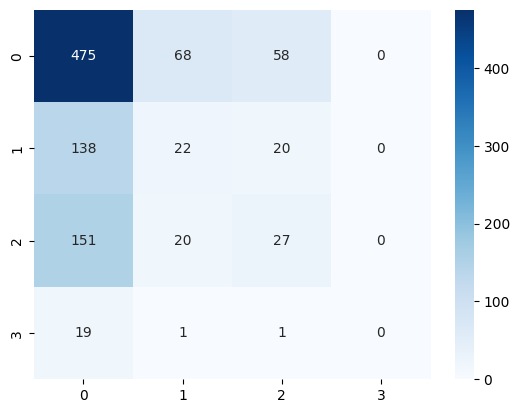

In [ ]:
import seaborn as sns
import numpy as np

# Your code to generate cnf_matrix
cnf_matrix = confusion_matrix(y_test,y_pred)

# Define group names and counts for annotations
group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in cnf_matrix.flatten()]
labels = np.asarray(group_counts).reshape(4, 4)

# Plot heatmap with annotations
sns.heatmap(cnf_matrix, annot=labels, fmt='', cmap='Blues');


####LSTM

In [ ]:
tokenizer = Tokenizer(num_words = 4000)
tokenizer.fit_on_texts(traindata['Preprocessed'])
input_sequences = []
for line in traindata['Preprocessed']:
    token_list = tokenizer.texts_to_sequences([line])[0]
    input_sequences.append(token_list)

# print(input_sequences)
print("Total input sequences: ", len(input_sequences))

Total input sequences:  5000


In [ ]:
# pad sequences
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))
input_sequences[1]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,  907,  906, 1151,
       2366], dtype=int32)

In [ ]:
from keras.utils import to_categorical

labels = traindata['Type']
y_categorical = to_categorical(labels, num_classes=4)

In [ ]:
X_train, X_val, y_train, y_val= train_test_split(input_sequences, y_categorical, test_size = 0.2, random_state = 42)

In [ ]:
model1 = Sequential()

model1.add(Embedding(4000, 300, weights = [tfidf_train_feature], input_length = max_sequence_len))
model1.add(Bidirectional(LSTM(units = 256, return_sequences = False)))
model1.add(Dense(4, activation = 'softmax'))
adam = Adam(learning_rate = 0.01)
model1.compile(loss = 'categorical_crossentropy', optimizer = adam, metrics = ['accuracy'])

model1.fit(X_train, y_train, epochs = 10, verbose = 1)

Epoch 1/10
125/125 [==============================] - 26s 141ms/step - loss: 0.5992 - accuracy: 0.7807
Epoch 2/10
125/125 [==============================] - 8s 61ms/step - loss: 0.1693 - accuracy: 0.9455
Epoch 3/10
125/125 [==============================] - 2s 16ms/step - loss: 0.0742 - accuracy: 0.9775
Epoch 4/10
125/125 [==============================] - 1s 9ms/step - loss: 0.0309 - accuracy: 0.9905
Epoch 5/10
125/125 [==============================] - 2s 13ms/step - loss: 0.0115 - accuracy: 0.9962
Epoch 6/10
125/125 [==============================] - 1s 11ms/step - loss: 0.0071 - accuracy: 0.9985
Epoch 7/10
125/125 [==============================] - 1s 9ms/step - loss: 0.0047 - accuracy: 0.9985
Epoch 8/10
125/125 [==============================] - 1s 9ms/step - loss: 0.0026 - accuracy: 0.9990
Epoch 9/10
125/125 [==============================] - 1s 9ms/step - loss: 0.0013 - accuracy: 0.9995
Epoch 10/10
125/125 [==============================] - 2s 13ms/step - loss: 7.0526e-04 - accu

In [ ]:
y_pred = model1.predict(X_val)

y_pred = np.argmax(y_pred, axis = -1)

y_val = np.argmax(y_val, axis = -1)

classification_report1 = classification_report(y_val, y_pred)
print(classification_report1)

32/32 [==============================] - 1s 4ms/step
              precision    recall  f1-score   support

           0       0.92      0.94      0.93       647
           1       0.79      0.77      0.78       176
           2       0.95      0.89      0.92       163
           3       0.64      0.64      0.64        14

    accuracy                           0.90      1000
   macro avg       0.83      0.81      0.82      1000
weighted avg       0.90      0.90      0.90      1000



###Bag Of Word

In [ ]:
x_train, x_val, y_train, y_val= train_test_split(x, y, test_size = 0.2, random_state = 42)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(max_features=500, stop_words=None, ngram_range=(1,1))

bw_train = vectorizer.fit_transform(x_train)
bw_train_f = pd.DataFrame(bw_train.toarray(), columns=vectorizer.get_feature_names_out())

bw_val = vectorizer.transform(x_val)
x_val_feater = pd.DataFrame(bw_val.toarray(), columns=vectorizer.get_feature_names_out())

####Naive bayse

In [ ]:
naive_bayes_classifier = GaussianNB()
# Use the toarray() method to convert sparse matrix to a dense matrix
naive_bayes_classifier.fit(bw_train.toarray(), y_train)

y_pred = naive_bayes_classifier.predict(x_val_feater.values)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.30
Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.36      0.44       601
           1       0.14      0.23      0.18       180
           2       0.16      0.21      0.18       198
           3       0.03      0.10      0.04        21

    accuracy                           0.30      1000
   macro avg       0.22      0.22      0.21      1000
weighted avg       0.40      0.30      0.33      1000



#### logistic

In [ ]:
logistic_regressor = LogisticRegression(random_state=0)
logistic_regressor.fit(bw_train.toarray(), y_train)


LogisticRegression(random_state=0)

In [ ]:
y_pred = logistic_regressor.predict(x_val_feater.values)


In [ ]:
accuracy = accuracy_score(y_test, y_pred)


In [ ]:
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.46
Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.69      0.63       601
           1       0.18      0.14      0.16       180
           2       0.14      0.11      0.12       198
           3       0.00      0.00      0.00        21

    accuracy                           0.46      1000
   macro avg       0.23      0.23      0.23      1000
weighted avg       0.41      0.46      0.43      1000



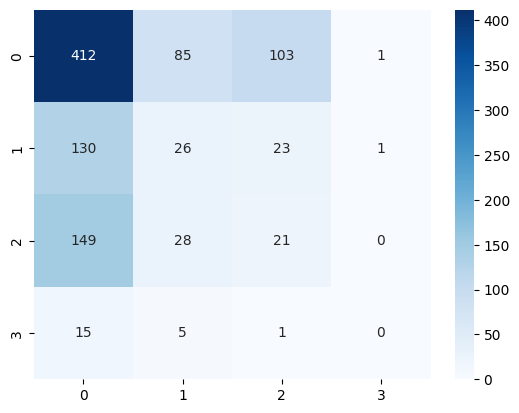

In [ ]:
import seaborn as sns
import numpy as np

# Your code to generate cnf_matrix
cnf_matrix = confusion_matrix(y_test,y_pred)

# Define group names and counts for annotations
group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in cnf_matrix.flatten()]
labels = np.asarray(group_counts).reshape(4, 4)

# Plot heatmap with annotations
sns.heatmap(cnf_matrix, annot=labels, fmt='', cmap='Blues');


####LSTM

In [ ]:
tokenizer = Tokenizer(num_words = 4000)
tokenizer.fit_on_texts(traindata['Preprocessed'])
input_sequences = []
for line in traindata['Preprocessed']:
    token_list = tokenizer.texts_to_sequences([line])[0]
    input_sequences.append(token_list)

# print(input_sequences)
print("Total input sequences: ", len(input_sequences))

Total input sequences:  5000


In [ ]:
# pad sequences
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))
input_sequences[1]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,  907,  906, 1151,
       2366], dtype=int32)

In [ ]:
from keras.utils import to_categorical

labels = traindata['Type']
y_categorical = to_categorical(labels, num_classes=4)

In [ ]:
X_train, X_val, y_train, y_val= train_test_split(input_sequences, y_categorical, test_size = 0.2, random_state = 42)

In [ ]:
model1 = Sequential()

model1.add(Embedding(4000, 500, weights = [bw_train.toarray()], input_length = max_sequence_len))

model1.add(Bidirectional(LSTM(units = 256, return_sequences = False)))
model1.add(Dense(4, activation = 'softmax'))
adam = Adam(learning_rate = 0.01)
model1.compile(loss = 'categorical_crossentropy', optimizer = adam, metrics = ['accuracy'])

model1.fit(X_train, y_train, epochs = 10, verbose = 1)

Epoch 1/10
125/125 [==============================] - 14s 73ms/step - loss: 0.4936 - accuracy: 0.8230
Epoch 2/10
125/125 [==============================] - 3s 23ms/step - loss: 0.1229 - accuracy: 0.9645
Epoch 3/10
125/125 [==============================] - 2s 20ms/step - loss: 0.0500 - accuracy: 0.9840
Epoch 4/10
125/125 [==============================] - 1s 10ms/step - loss: 0.0218 - accuracy: 0.9937
Epoch 5/10
125/125 [==============================] - 1s 11ms/step - loss: 0.0042 - accuracy: 0.9990
Epoch 6/10
125/125 [==============================] - 1s 9ms/step - loss: 0.0013 - accuracy: 0.9995
Epoch 7/10
125/125 [==============================] - 1s 10ms/step - loss: 6.3670e-04 - accuracy: 0.9998
Epoch 8/10
125/125 [==============================] - 1s 12ms/step - loss: 8.2379e-04 - accuracy: 0.9995
Epoch 9/10
125/125 [==============================] - 1s 8ms/step - loss: 6.8990e-04 - accuracy: 0.9998
Epoch 10/10
125/125 [==============================] - 1s 8ms/step - loss: 5.265

In [ ]:
y_pred = model1.predict(X_val)

y_pred = np.argmax(y_pred, axis = -1)

y_val = np.argmax(y_val, axis = -1)

classification_report1 = classification_report(y_val, y_pred)
print(classification_report1)

32/32 [==============================] - 1s 3ms/step
              precision    recall  f1-score   support

           0       0.92      0.94      0.93       647
           1       0.81      0.75      0.78       176
           2       0.92      0.91      0.91       163
           3       0.47      0.50      0.48        14

    accuracy                           0.89      1000
   macro avg       0.78      0.77      0.78      1000
weighted avg       0.89      0.89      0.89      1000



###Word2vec

####CBoW

In [ ]:
!wget "https://archive.org/download/aravec2.0/wiki_cbow_300.zip"

--2024-06-11 23:08:28--  https://archive.org/download/aravec2.0/wiki_cbow_300.zip
Resolving archive.org (archive.org)... 207.241.224.2
Connecting to archive.org (archive.org)|207.241.224.2|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://ia803107.us.archive.org/0/items/aravec2.0/wiki_cbow_300.zip [following]
--2024-06-11 23:08:28--  https://ia803107.us.archive.org/0/items/aravec2.0/wiki_cbow_300.zip
Resolving ia803107.us.archive.org (ia803107.us.archive.org)... 207.241.232.157
Connecting to ia803107.us.archive.org (ia803107.us.archive.org)|207.241.232.157|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 364888893 (348M) [application/zip]
Saving to: ‘wiki_cbow_300.zip.1’

wiki_cbow_300.zip.1 100%[===================>] 347.98M  1004KB/s    in 5m 33s  

2024-06-11 23:14:02 (1.04 MB/s) - ‘wiki_cbow_300.zip.1’ saved [364888893/364888893]



In [ ]:
!unzip "wiki_cbow_300.zip"

Archive:  wiki_cbow_300.zip
replace wikipedia_cbow_300? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
X = x = traindata['Preprocessed']
y = traindata['Type']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [ ]:
from gensim.models import Word2Vec


In [ ]:
w2v_model = Word2Vec.load('/content/wikipedia_cbow_300')
embedding_dim = w2v_model.vector_size

OOV_tokens = []
train_tokens = []
test_tokens = []

def get_doc_vec(sent, model, data):
    w2v_embeddings = []
    tokens = sent.split()
    for word in tokens:
        try:
            if data == 'train':
                w2v_embeddings.append(model.wv[word])
                train_tokens.append(word)
            else:
                w2v_embeddings.append(model.wv[word])
                test_tokens.append(word)
        except:
            OOV_tokens.append(word)
            continue
    if len(w2v_embeddings) == 0:
        return None
    return sum(w2v_embeddings) / len(w2v_embeddings)

X_train_w2v_embeddings = X_train.apply(lambda sent: get_doc_vec(sent, w2v_model, 'train'))
X_test_w2v_embeddings = X_test.apply(lambda sent: get_doc_vec(sent, w2v_model, 'test'))

In [ ]:
X_train_w2v_embeddings_list = []
for embedding in X_train_w2v_embeddings:
    if embedding is not None:
        X_train_w2v_embeddings_list.append(embedding)
    else:
        # Handle cases where the embedding is None
        X_train_w2v_embeddings_list.append(np.zeros_like(X_train_w2v_embeddings[0]))

X_test_w2v_embeddings_list = []
for embedding in X_test_w2v_embeddings:
    if embedding is not None:
        X_test_w2v_embeddings_list.append(embedding)
    else:
        # Handle cases where the embedding is None
        X_test_w2v_embeddings_list.append(np.zeros_like(X_test_w2v_embeddings[0]))


In [ ]:
X_train_w2v_embeddings_array = np.array(X_train_w2v_embeddings_list)
X_test_w2v_embeddings_array = np.array(X_test_w2v_embeddings_list)

#####Navie Base

In [ ]:
naive_bayes_classifier = GaussianNB()
naive_bayes_classifier.fit(X_train_w2v_embeddings_array, y_train)

y_pred = naive_bayes_classifier.predict(X_test_w2v_embeddings_array)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

#####logistic

In [ ]:
classifier = LogisticRegression(max_iter=1000)
classifier.fit(X_train_w2v_embeddings_array, y_train)


In [ ]:
y_pred = classifier.predict(X_test_w2v_embeddings_array)


In [ ]:
print(classification_report(y_test, y_pred))


In [ ]:
cnf_matrix = confusion_matrix(y_test, y_pred)


In [ ]:
group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in cnf_matrix.flatten()]
labels = np.asarray(group_counts).reshape(4, 4)

In [ ]:
sns.heatmap(cnf_matrix, annot=labels, fmt='', cmap='Blues')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix')
plt.show()

#####LSTM

In [ ]:
tokenizer = Tokenizer(num_words = 4000)
tokenizer.fit_on_texts(traindata['Preprocessed'])
input_sequences = []
for line in traindata['Preprocessed']:
    token_list = tokenizer.texts_to_sequences([line])[0]
    input_sequences.append(token_list)

# print(input_sequences)
print("Total input sequences: ", len(input_sequences))

In [ ]:
# pad sequences
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))
input_sequences[1]

In [ ]:
from keras.utils import to_categorical

labels = traindata['Type']
y_categorical = to_categorical(labels, num_classes=4)

In [ ]:
pad_X_train, pad_X_validation, y_train_lstm, y_validation_lstm= train_test_split(input_sequences, y_categorical, test_size = 0.2, random_state = 42)

In [ ]:
model1 = Sequential()

model1.add(Embedding(4000, 300, weights = [X_train_w2v_embeddings_array], input_length = max_sequence_len))

model1.add(Bidirectional(LSTM(units = 256, return_sequences = False)))
model1.add(Dense(4, activation = 'softmax'))
adam = Adam(learning_rate = 0.01)
model1.compile(loss = 'categorical_crossentropy', optimizer = adam, metrics = ['accuracy'])

model1.fit(pad_X_train, y_train_lstm, epochs = 10, verbose = 1)

In [ ]:
y_pred_lstm_CBoW = model1.predict(pad_X_validation)

y_pred_lstm_CBoW = np.argmax(y_pred_lstm_CBoW, axis = -1)

y_validation_lstm_CBoW = np.argmax(y_validation_lstm, axis = -1)

classification_report1 = classification_report(y_validation_lstm_CBoW, y_pred_lstm_CBoW)
print(classification_report1)

####SkipGram

In [ ]:
!wget 'https://bakrianoo.ewr1.vultrobjects.com/aravec/full_grams_sg_300_wiki.zip'

In [ ]:
!unzip '/content/full_grams_sg_300_wiki.zip'

In [ ]:
X = x = traindata['Preprocessed']
y = traindata['Type']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
from gensim.models import Word2Vec


In [ ]:
w2v_model = Word2Vec.load('/content/full_grams_sg_300_wiki.mdl')
embedding_dim = w2v_model.vector_size
OOV_tokens = []
train_tokens = []
test_tokens = []

def get_doc_vec(sent, model, data):
    w2v_embeddings = []
    tokens = sent.split()
    for word in tokens:
        try:
            if data == 'train':
                w2v_embeddings.append(model.wv[word])
                train_tokens.append(word)
            else:
                w2v_embeddings.append(model.wv[word])
                test_tokens.append(word)
        except:
            OOV_tokens.append(word)
            continue
    if len(w2v_embeddings) == 0:
        return None
    return sum(w2v_embeddings) / len(w2v_embeddings)

X_train_w2v_embeddings = X_train.apply(lambda sent: get_doc_vec(sent, w2v_model, 'train'))
X_test_w2v_embeddings = X_test.apply(lambda sent: get_doc_vec(sent, w2v_model, 'test'))

In [ ]:
X_train_w2v_embeddings_list = []
for embedding in X_train_w2v_embeddings:
    if embedding is not None:
        X_train_w2v_embeddings_list.append(embedding)
    else:
        # Handle cases where the embedding is None
        X_train_w2v_embeddings_list.append(np.zeros_like(X_train_w2v_embeddings[0]))

X_test_w2v_embeddings_list = []
for embedding in X_test_w2v_embeddings:
    if embedding is not None:
        X_test_w2v_embeddings_list.append(embedding)
    else:
        # Handle cases where the embedding is None
        X_test_w2v_embeddings_list.append(np.zeros_like(X_test_w2v_embeddings[0]))


In [ ]:
X_train_w2v_embeddings_array_skip = np.array(X_train_w2v_embeddings_list)
X_test_w2v_embeddings_array_skip = np.array(X_test_w2v_embeddings_list)

##### Naive bayes

In [ ]:
naive_bayes_classifier = GaussianNB()
naive_bayes_classifier.fit(X_train_w2v_embeddings_array_skip, y_train)

y_pred = naive_bayes_classifier.predict(X_test_w2v_embeddings_array_skip)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

#####logistic

In [ ]:
classifier = LogisticRegression(max_iter=1000)
classifier.fit(X_train_w2v_embeddings_array, y_train)


In [ ]:
y_pred = classifier.predict(X_test_w2v_embeddings_array)


In [ ]:
print(classification_report(y_test, y_pred))


In [ ]:
cnf_matrix = confusion_matrix(y_test, y_pred)


In [ ]:
group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in cnf_matrix.flatten()]
labels = np.asarray(group_counts).reshape(4, 4)

In [ ]:
sns.heatmap(cnf_matrix, annot=labels, fmt='', cmap='Blues')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix')
plt.show()

#####LSTM

In [ ]:
tokenizer = Tokenizer(num_words = 4000) # يأخذ اكثر 4000 كلمة تكررت بالداتا لدينا
tokenizer.fit_on_texts(traindata['Preprocessed'])
input_sequences = []
for line in traindata['Preprocessed']:
    token_list = tokenizer.texts_to_sequences([line])[0]
    input_sequences.append(token_list)

# print(input_sequences)
print("Total input sequences: ", len(input_sequences))

In [ ]:
# pad sequences
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))
input_sequences[1]

In [ ]:
from keras.utils import to_categorical

labels = traindata['Type']
y_categorical = to_categorical(labels, num_classes=4)

In [ ]:
X_train, X_val, y_train, y_val= train_test_split(input_sequences, y_categorical, test_size = 0.2, random_state = 42)

In [ ]:
model1 = Sequential()
model1.add(Embedding(4000, 300, weights = [X_train_w2v_embeddings_array_skip], input_length = max_sequence_len))
model1.add(Bidirectional(LSTM(units = 256, return_sequences = False))) # nerons
model1.add(Dense(4, activation = 'softmax'))
adam = Adam(learning_rate = 0.01)
model1.compile(loss = 'categorical_crossentropy', optimizer = adam, metrics = ['accuracy'])
model1.fit(pad_X_train, y_train_lstm, epochs = 10, verbose = 1)

In [ ]:
y_pred_skip = model1.predict(X_val)

y_pred_skip = np.argmax(y_pred_skip, axis = -1)

y_val_skip = np.argmax(y_val, axis = -1)

classification_report1 = classification_report(y_val_skip, y_pred_skip)
print(classification_report1)

###Bert

In [ ]:
!pip install transformers


In [ ]:
import torch
from transformers import AutoTokenizer, AutoModel
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import numpy as np

# Define the device based on CUDA availability
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Loading the tokenizer and model from Hugging Face
model_name = 'aubmindlab/bert-base-arabert'
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModel.from_pretrained(model_name)

# Move model to the appropriate device
model = model.to(device)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [ ]:
# Assuming df['News_processed'] contains the preprocessed text
embeddings_list = []
for text in traindata['Preprocessed']:
    encoded_input = tokenizer(text, padding=True, truncation=True, max_length=512, return_tensors='pt').to(device)
    # Truncation shortens the text to fit the model
    with torch.no_grad():  # No need to calculate gradients during inference
        output = model(**encoded_input)  # Pass the encoded input to the model , ** to see the inside the list

    # Getting the mean of the last hidden state to represent the sentence
    mean_embeddings = output.last_hidden_state.mean(dim=1).squeeze().cpu().numpy()
    embeddings_list.append(mean_embeddings)

X = np.array(embeddings_list)
y = traindata['Type'].values

####Logistic

In [ ]:

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Training a Logistic Regression model (This part is CPU based as sklearn does not use GPU)
classifier = LogisticRegression(max_iter=1000)
classifier.fit(X_train, y_train)

# Predicting on the test set
y_pred = classifier.predict(X_test)

# Evaluating the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       601
           1       0.84      0.81      0.82       180
           2       0.96      0.95      0.96       198
           3       0.65      0.52      0.58        21

    accuracy                           0.92      1000
   macro avg       0.85      0.81      0.83      1000
weighted avg       0.92      0.92      0.92      1000



####naive bayes

In [ ]:

# Training a Gaussian Naive Bayes model
naive_bayes_classifier = GaussianNB()
naive_bayes_classifier.fit(X_train, y_train)

# Predicting on the test set
y_pred = naive_bayes_classifier.predict(X_test)

# Evaluating the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.91      0.92       601
           1       0.79      0.76      0.78       180
           2       0.97      0.90      0.93       198
           3       0.23      0.67      0.35        21

    accuracy                           0.87      1000
   macro avg       0.73      0.81      0.74      1000
weighted avg       0.90      0.87      0.88      1000



####LSTM

In [ ]:
embeddings_array = np.array(embeddings_list)
embeddings_array.shape

(5000, 768)

In [ ]:
from sklearn.decomposition import PCA

# Initialize PCA to reduce dimensions to 300
pca = PCA(n_components=300)
embeddings_reduced = pca.fit_transform(embeddings_array)

# Check new shape
print("Reduced embeddings shape:", embeddings_reduced.shape)


Reduced embeddings shape: (5000, 300)


In [ ]:
embeddings_final = embeddings_reduced[:4000]


In [ ]:
tokenizer = Tokenizer(num_words = 4000)
tokenizer.fit_on_texts(traindata['Preprocessed'])
input_sequences = []
for line in traindata['Preprocessed']:
    token_list = tokenizer.texts_to_sequences([line])[0]
    input_sequences.append(token_list)

# print(input_sequences)
print("Total input sequences: ", len(input_sequences))

Total input sequences:  5000


In [ ]:
# pad sequences
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))
input_sequences[1]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,  907,  906, 1151,
       2366], dtype=int32)

In [ ]:
from keras.utils import to_categorical

labels = traindata['Type']
y_categorical = to_categorical(labels, num_classes=4)

In [ ]:
pad_X_train, pad_X_validation, y_train_lstm, y_validation_lstm= train_test_split(input_sequences, y_categorical, test_size = 0.2, random_state = 42)

In [ ]:
model1 = Sequential()

model1.add(Embedding(4000, 300, weights = [embeddings_final], input_length = max_sequence_len))

model1.add(Bidirectional(LSTM(units = 256, return_sequences = False)))
model1.add(Dense(4, activation = 'softmax'))
adam = Adam(learning_rate = 0.01)
model1.compile(loss = 'categorical_crossentropy', optimizer = adam, metrics = ['accuracy'])

model1.fit(pad_X_train, y_train_lstm, epochs = 10, verbose = 1)

Epoch 1/10
125/125 [==============================] - 10s 51ms/step - loss: 0.5357 - accuracy: 0.8152
Epoch 2/10
125/125 [==============================] - 2s 19ms/step - loss: 0.1430 - accuracy: 0.9538
Epoch 3/10
125/125 [==============================] - 2s 13ms/step - loss: 0.0442 - accuracy: 0.9862
Epoch 4/10
125/125 [==============================] - 2s 15ms/step - loss: 0.0114 - accuracy: 0.9960
Epoch 5/10
125/125 [==============================] - 2s 19ms/step - loss: 0.0040 - accuracy: 0.9990
Epoch 6/10
125/125 [==============================] - 2s 18ms/step - loss: 0.0016 - accuracy: 0.9992
Epoch 7/10
125/125 [==============================] - 2s 16ms/step - loss: 9.0460e-04 - accuracy: 0.9998
Epoch 8/10
125/125 [==============================] - 2s 19ms/step - loss: 5.0396e-04 - accuracy: 0.9995
Epoch 9/10
125/125 [==============================] - 2s 12ms/step - loss: 7.0759e-04 - accuracy: 0.9998
Epoch 10/10
125/125 [==============================] - 2s 15ms/step - loss: 6.

In [ ]:
y_pred_lstm_skip = model1.predict(pad_X_validation)

y_pred_lstm_skip = np.argmax(y_pred_lstm_skip, axis = -1)

y_validation_lstm_skip = np.argmax(y_validation_lstm, axis = -1)

classification_report1 = classification_report(y_validation_lstm_skip, y_pred_lstm_skip)
print(classification_report1)

32/32 [==============================] - 1s 5ms/step
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       647
           1       0.84      0.81      0.82       176
           2       0.93      0.93      0.93       163
           3       0.60      0.43      0.50        14

    accuracy                           0.91      1000
   macro avg       0.82      0.78      0.80      1000
weighted avg       0.91      0.91      0.91      1000



####BERT

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

x = traindata['Preprocessed']
y = le.fit_transform(traindata['Type'])

X_train, X_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=0)

# Initialize the tokenizer
tokenizer = BertTokenizer.from_pretrained('aubmindlab/bert-base-arabert')

# Tokenize the data
training = tokenizer(X_train.tolist(), add_special_tokens=True, return_attention_mask=True,
                     padding='max_length', max_length=256, return_tensors='pt')
testing = tokenizer(X_val.tolist(), add_special_tokens=True, return_attention_mask=True,
                    padding='max_length', max_length=256, return_tensors='pt')

train_dataset = TensorDataset(training['input_ids'], training['attention_mask'], torch.tensor(y_train))
test_dataset = TensorDataset(testing['input_ids'], testing['attention_mask'], torch.tensor(y_val))

train_loader = DataLoader(train_dataset, sampler=RandomSampler(train_dataset), batch_size=24)
test_loader = DataLoader(test_dataset, sampler=SequentialSampler(test_dataset), batch_size=24)

model = BertForSequenceClassification.from_pretrained('aubmindlab/bert-base-arabert', num_labels=4,
                                                      output_attentions=False, output_hidden_states=False)
model.to(device)

# Set up the optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=5e-5)

# Training
epochs = 2
for epoch in range(epochs):
    model.train()
    total_loss = 0
    for batch in train_loader:
        b_input_ids, b_input_mask, b_labels = [t.to(device) for t in batch]

        model.zero_grad() # بعد عمل رن في الباكوورد بتخلي كل قيم الجريدينت زيرو عشان ما تأثر على اللوس
        outputs = model(b_input_ids, token_type_ids=None, attention_mask=b_input_mask, labels=b_labels)
        loss = outputs.loss
        loss.backward()
        optimizer.step()  # Update the parameters based on the gradients

        total_loss += loss.item() # تأخذ اللوس عن طريق جعله ارقام دون الحاجة الى استخدام فانكككشن

    print(f"Epoch {epoch+1}, Loss: {total_loss/len(train_loader)}")

# Evaluation
model.eval()
predictions, true_labels = [], []

for batch in test_loader:
    b_input_ids, b_input_mask, b_labels = [t.to(device) for t in batch]

    with torch.no_grad():
        outputs = model(b_input_ids, token_type_ids=None, attention_mask=b_input_mask)

    logits = outputs.logits
    logits = logits.detach().cpu().numpy()
    label_ids = b_labels.to('cpu').numpy()

    batch_predictions = np.argmax(logits, axis=1)
    predictions.extend(batch_predictions)  # Ensure predictions is a list
    true_labels.extend(label_ids)          # Ensure true_labels is a list

# Calculate and print metrics
accuracy = np.mean(np.array(predictions) == np.array(true_labels))
print("Accuracy:", accuracy)
precision = precision_score(true_labels, predictions, average='weighted')
recall = recall_score(true_labels, predictions, average='weighted')
f1 = f1_score(true_labels, predictions, average='weighted')
report = classification_report(true_labels, predictions)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Classification Report:\n", report)


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at aubmindlab/bert-base-arabert and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1, Loss: 0.28544842476348675
Epoch 2, Loss: 0.12787735297673655
Accuracy: 0.937
Precision: 0.9382517654989841
Recall: 0.937
F1 Score: 0.9373779796268376
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.95      0.95       601
           1       0.87      0.86      0.86       180
           2       0.96      0.98      0.97       198
           3       0.69      0.86      0.77        21

    accuracy                           0.94      1000
   macro avg       0.87      0.91      0.89      1000
weighted avg       0.94      0.94      0.94      1000

